# Insight-Driven Employee Retention Strategies in the `Pharmaceutical Industry`

# Introduction
Employee retention is crucial in the pharmaceutical industry due to the high costs associated with training and the loss of expertise when employees leave. This project aims to develop insight-driven strategies to improve employee retention by analyzing relevant data and building predictive models.

# Problem Statement
1. **High employee turnover in the pharmaceutical industry leads to increased costs and loss of expertise.**
2. **The goal is to identify factors contributing to employee turnover and develop strategies to retain valuable employees.**


### Objectives
1. **Identify key factors influencing employee retention.**
2. **Develop predictive models to identify employees at risk of leaving.**
3. **Provide actionable insights and recommendations to improve employee retention.**

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
warnings.filterwarnings("ignore")
sns.set_context("notebook")

In [2]:
data = pd.read_csv('Employee_Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print("There are {:,} rows and {} columns in the data.".format(data.shape[0], data.shape[1]))
print("There are {} missing values in the data.".format(data.isnull().sum().sum()))

There are 1,470 rows and 35 columns in the data.
There are 0 missing values in the data.


## <b><span style='color:#68A19B'>1.1</span> | Summary Statistics of numeric variables</b>

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## <b><span style='color:#68A19B'>1.2</span> | Summary Statistics of categorical variables</b>

In [5]:
# Get list of categorical columns
cat_cols = data.select_dtypes(include='object').columns.tolist()

# Create a DataFrame with counts of unique values for each categorical column
cat_df = (
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts()
    .reset_index(name='count')
    .sort_values(by=['column', 'count'])
)

# Display the description of categorical columns and the value counts DataFrame
display(data[cat_cols].describe())
display(cat_df)


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


,column,value,count
18,Attrition,Yes,237
1,Attrition,No,1233
20,BusinessTravel,Non-Travel,150
16,BusinessTravel,Travel_Frequently,277
3,BusinessTravel,Travel_Rarely,1043
28,Department,Human Resources,63
11,Department,Sales,446
4,Department,Research & Development,961
30,EducationField,Human Resources,27
26,EducationField,Other,82


# Exploratory Data Analysis

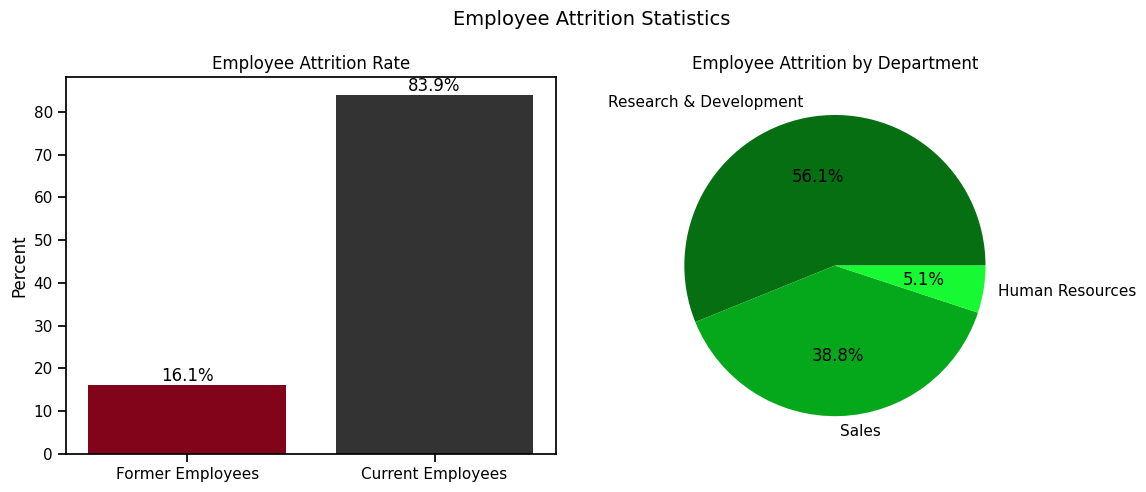

In [6]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Employee Attrition Statistics", fontsize=14)

# Bar chart
attrition_data = data['Attrition'].value_counts(normalize=True) * 100
labels = ['Former Employees', 'Current Employees']  
ax1.bar(labels, attrition_data[::-1], color=['#81041B', '#333334']) 
ax1.set_ylabel('Percent')
ax1.set_title('Employee Attrition Rate')
for i, v in enumerate(attrition_data[::-1]):  # Reversed data for text
    ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Pie chart
dept_data = data[data.Attrition == 'Yes']['Department'].value_counts(normalize=True) * 100
ax2.pie(dept_data, labels=dept_data.index, autopct='%1.1f%%', 
        colors=['#056F12', '#05A81A', '#16F933'])
ax2.set_title('Employee Attrition by Department')

plt.tight_layout()
plt.show()

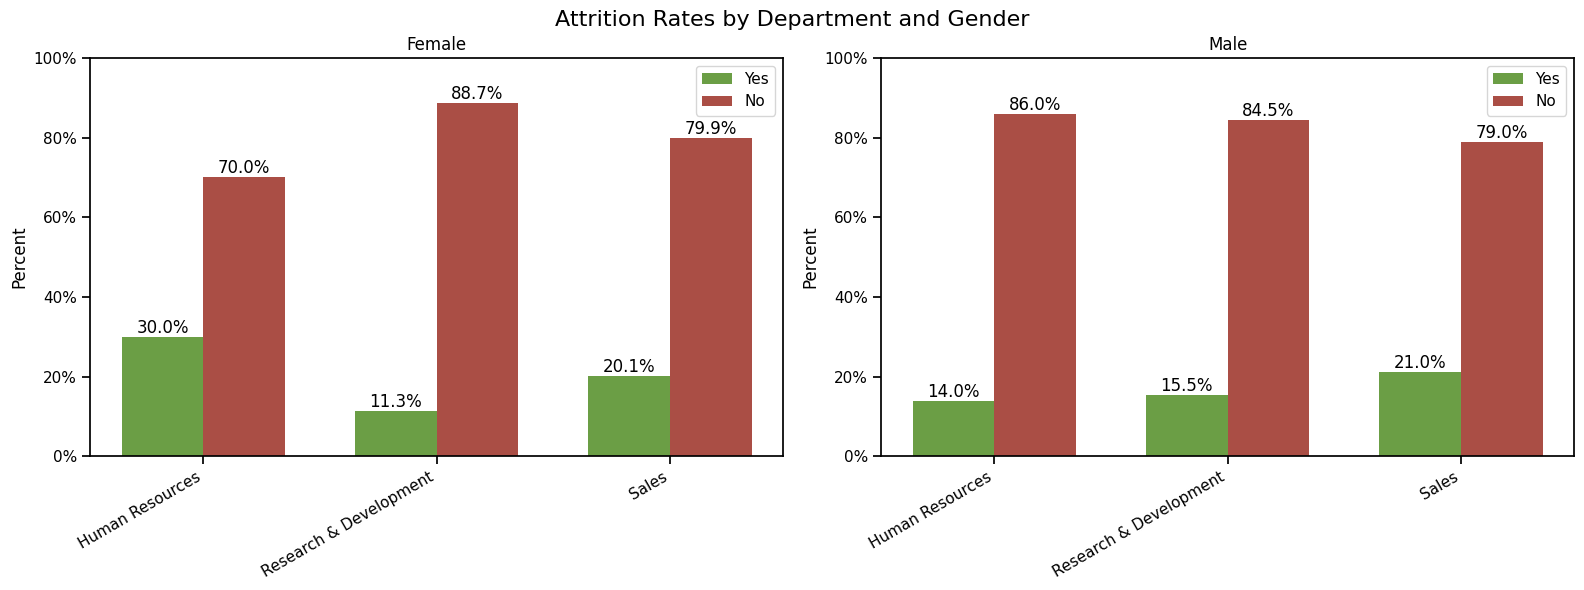

In [7]:
# Prepare the data
plot_df = data.groupby(['Gender', 'Department', 'Attrition']).size().unstack(fill_value=0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Attrition Rates by Department and Gender', fontsize=16)

colors = {'Yes': '#3A7E06', 'No': '#8E1306'}

def plot_grouped_bars(ax, data, title):
    x = np.arange(len(data.index))
    width = 0.35
    
    ax.bar(x - width/2, data['Yes'], width, label='Yes', color=colors['Yes'], alpha=0.75)
    ax.bar(x + width/2, data['No'], width, label='No', color=colors['No'], alpha=0.75)
    
    ax.set_ylabel('Percent')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(data.index, rotation=30, ha='right')
    ax.legend()
    
    for i, (yes, no) in enumerate(zip(data['Yes'], data['No'])):
        ax.text(i - width/2, yes, f'{yes:.1f}%', ha='center', va='bottom')
        ax.text(i + width/2, no, f'{no:.1f}%', ha='center', va='bottom')
    
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# Plot for each gender
plot_grouped_bars(ax1, plot_df.loc['Female'], 'Female')
plot_grouped_bars(ax2, plot_df.loc['Male'], 'Male')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()


Women in Human Resources experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest turnover occurred in the Sales department.

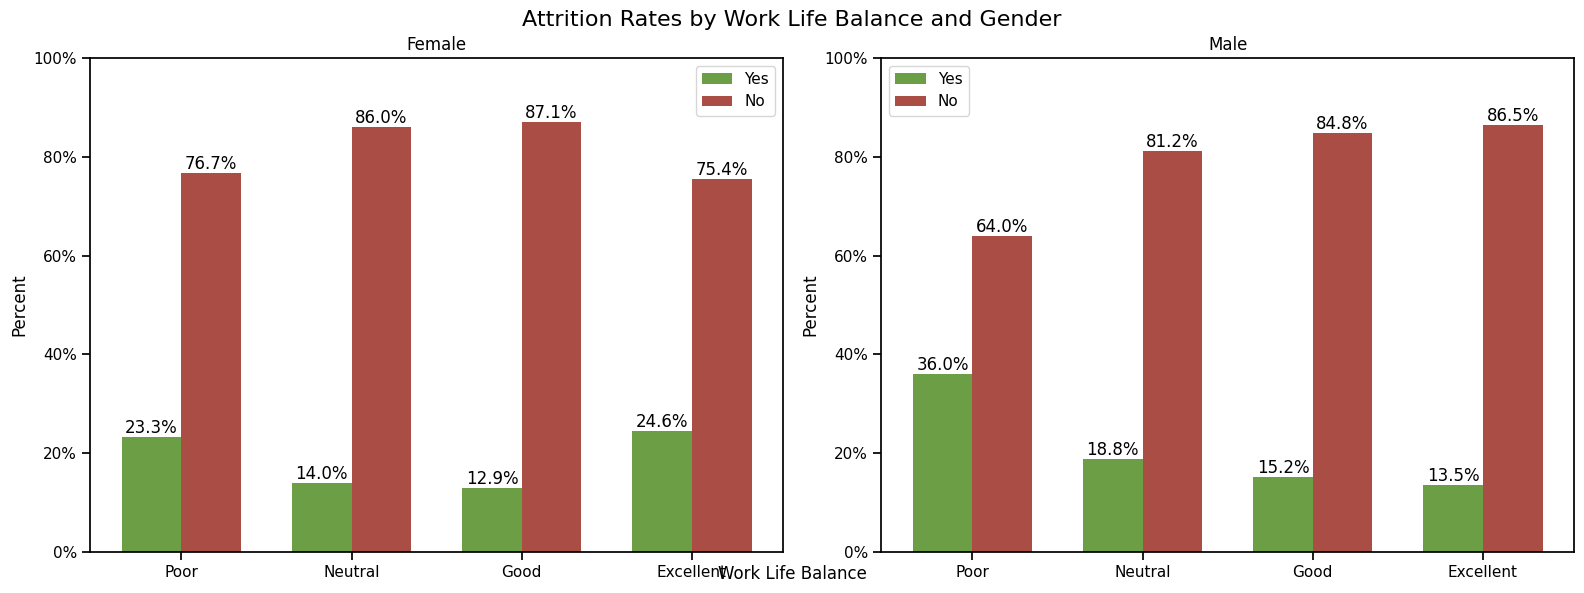

In [8]:
# Prepare the data
plot_df = data.groupby(['WorkLifeBalance', 'Gender', 'Attrition']).size().unstack(level='Attrition', fill_value=0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100
plot_df = plot_df.reset_index()

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Attrition Rates by Work Life Balance and Gender', fontsize=16)

colors = {'Yes': '#3A7E06', 'No': '#8E1306'}

def plot_grouped_bars(ax, data, title):
    x = np.arange(len(data['WorkLifeBalance'].unique()))
    width = 0.35
    
    ax.bar(x - width/2, data['Yes'], width, label='Yes', color=colors['Yes'], alpha=0.75)
    ax.bar(x + width/2, data['No'], width, label='No', color=colors['No'], alpha=0.75)
    
    ax.set_ylabel('Percent')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(['Poor', 'Neutral', 'Good', 'Excellent'])
    ax.legend()
    
    for i, (yes, no) in enumerate(zip(data['Yes'], data['No'])):
        ax.text(i - width/2, yes, f'{yes:.1f}%', ha='center', va='bottom')
        ax.text(i + width/2, no, f'{no:.1f}%', ha='center', va='bottom')
    
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# Plot for each gender
plot_grouped_bars(ax1, plot_df[plot_df['Gender'] == 'Female'], 'Female')
plot_grouped_bars(ax2, plot_df[plot_df['Gender'] == 'Male'], 'Male')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.text(0.5, 0.04, 'Work Life Balance', ha='center', va='center')
plt.show()


Among women with the highest rated work life balance, 1 out of 4 left the company, the highest proportion among the ratings for women. For men, the highest proportion occurred in those with the lowest work life balance. 

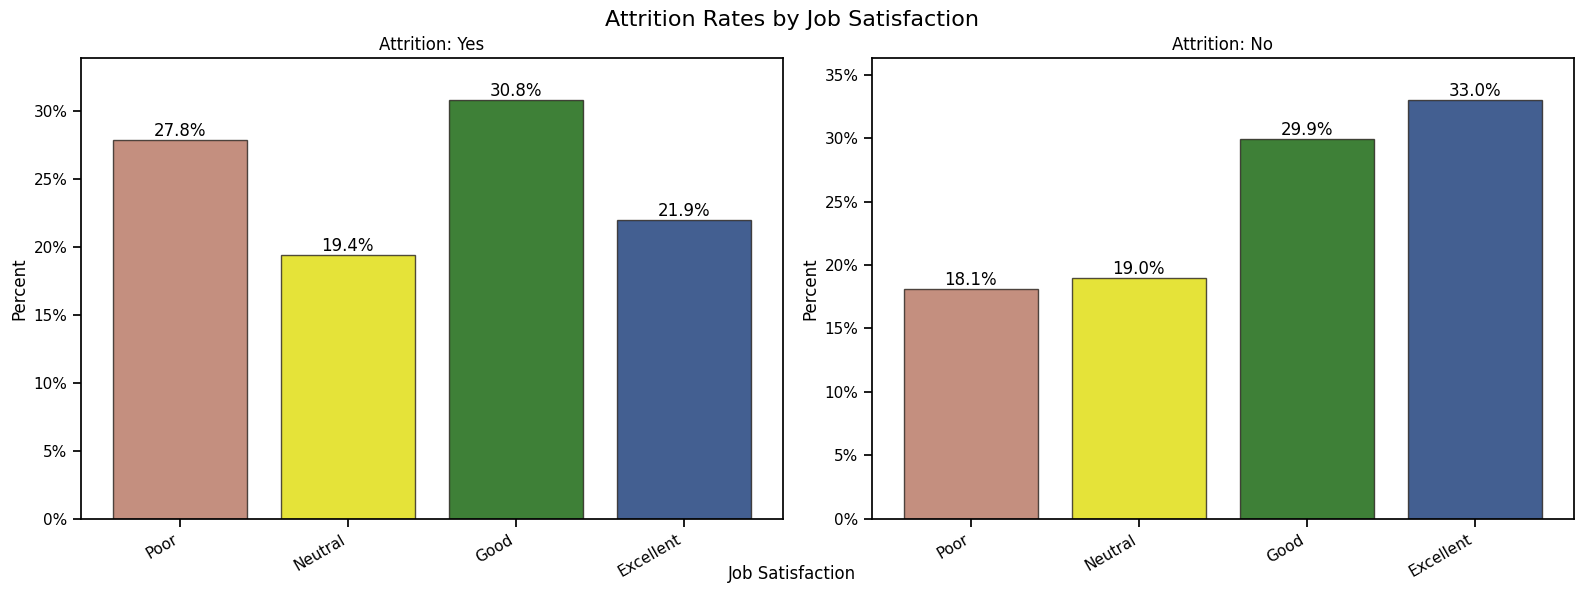

In [9]:
# Prepare the data
plot_df = data.groupby(['Attrition', 'JobSatisfaction']).size().unstack(fill_value=0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100
plot_df = plot_df.reset_index()

# Rename JobSatisfaction categories
satisfaction_map = {1: 'Poor', 2: 'Neutral', 3: 'Good', 4: 'Excellent'}
plot_df.columns = ['Attrition'] + [satisfaction_map.get(col, col) for col in plot_df.columns[1:]]

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Attrition Rates by Job Satisfaction', fontsize=16)

colors = ['#B6735F', '#DFDC07', '#0E6105', '#143776']

def plot_bars(ax, data, title):
    x = data.columns[1:]
    ax.bar(x, data.iloc[0, 1:], color=colors, alpha=0.8, edgecolor='#28221D', linewidth=1)
    
    ax.set_ylabel('Percent')
    ax.set_title(title)
    ax.set_xticklabels(x, rotation=30, ha='right')
    
    for i, v in enumerate(data.iloc[0, 1:]):
        ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')
    
    ax.set_ylim(0, max(data.iloc[0, 1:]) * 1.1)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))

# Plot for each attrition category
plot_bars(ax1, plot_df[plot_df['Attrition'] == 'Yes'], 'Attrition: Yes')
plot_bars(ax2, plot_df[plot_df['Attrition'] == 'No'], 'Attrition: No')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
fig.text(0.5, 0.04, 'Job Satisfaction', ha='center', va='center')
plt.show()


Among employees who left, the majority were satisfied in their job with 53% rating their job satisfaction as Good or Excellent, while 28% were the least satisfied in their job.

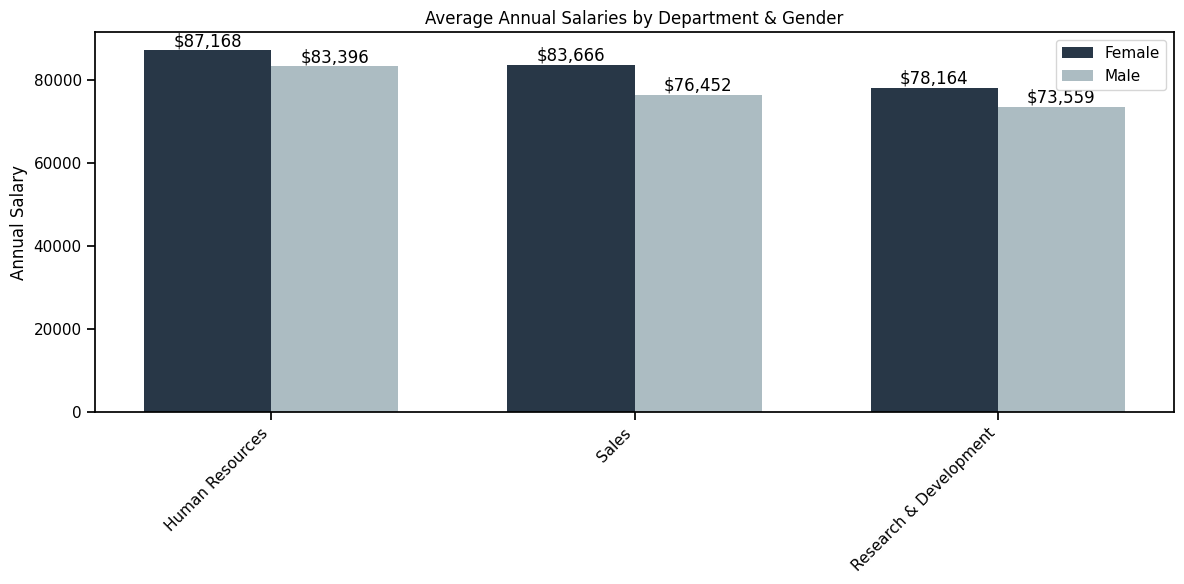

In [10]:
# Calculate average monthly salary by Department and Gender, then annualize the salary
average_salary = data.groupby(['Department', 'Gender'])['MonthlyIncome'].mean() * 12
average_salary = average_salary.rename('AnnualSalary').reset_index().sort_values('AnnualSalary', ascending=False)

# Prepare data for plotting
departments = average_salary['Department'].unique()
female_salaries = average_salary[average_salary['Gender'] == 'Female']['AnnualSalary']
male_salaries = average_salary[average_salary['Gender'] == 'Male']['AnnualSalary']

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar and positions of the bars
width = 0.35
x = np.arange(len(departments))

# Create the bars
ax.bar(x - width/2, female_salaries, width, label='Female', color='#283747')
ax.bar(x + width/2, male_salaries, width, label='Male', color='#ACBCC2')

# Customize the plot
ax.set_ylabel('Annual Salary')
ax.set_title('Average Annual Salaries by Department & Gender')
ax.set_xticks(x)
ax.set_xticklabels(departments, rotation=45, ha='right')
ax.legend()

# Add value labels on top of each bar
for i, v in enumerate(female_salaries):
    ax.text(i - width/2, v, f'${v:,.0f}', ha='center', va='bottom')
for i, v in enumerate(male_salaries):
    ax.text(i + width/2, v, f'${v:,.0f}', ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Across each department, women on average have higher salaries than men. 

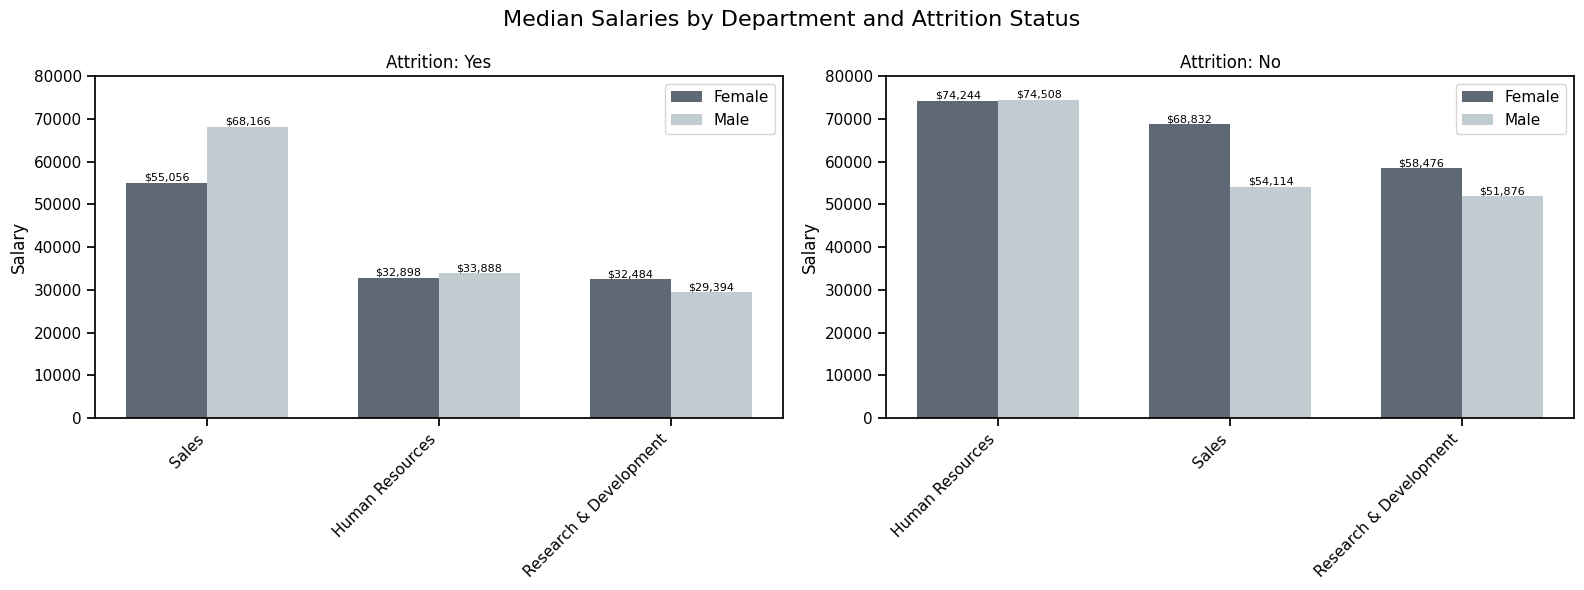

In [11]:
# Prepare data
plot_df = data.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median() * 12
plot_df = plot_df.reset_index(name='Salary').sort_values(['Gender', 'Salary'], ascending=[True, False])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Median Salaries by Department and Attrition Status', fontsize=16)

# Function to plot grouped bars
def plot_bars(ax, data, title):
    departments = data['Department'].unique()
    x = np.arange(len(departments))
    width = 0.35
    
    female_salaries = data[data['Gender'] == 'Female']['Salary']
    male_salaries = data[data['Gender'] == 'Male']['Salary']
    
    ax.bar(x - width/2, female_salaries, width, label='Female', color='#283747', alpha=0.75)
    ax.bar(x + width/2, male_salaries, width, label='Male', color='#ACBCC2', alpha=0.75)
    
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(departments, rotation=45, ha='right')
    ax.set_ylabel('Salary')
    ax.set_ylim(0, 80000)
    ax.legend()
    
    # Add salary labels
    for i, v in enumerate(female_salaries):
        ax.text(i - width/2, v, f'${v:,.0f}', ha='center', va='bottom', fontsize=8)
    for i, v in enumerate(male_salaries):
        ax.text(i + width/2, v, f'${v:,.0f}', ha='center', va='bottom', fontsize=8)

# Plot for each attrition status
plot_bars(ax1, plot_df[plot_df['Attrition'] == 'Yes'], 'Attrition: Yes')
plot_bars(ax2, plot_df[plot_df['Attrition'] == 'No'], 'Attrition: No')

plt.tight_layout()
plt.show()


In comparison to current employees, former employees had lower median salaries across all three departments. In Human Resources, women tend to have higher median salaries than men.

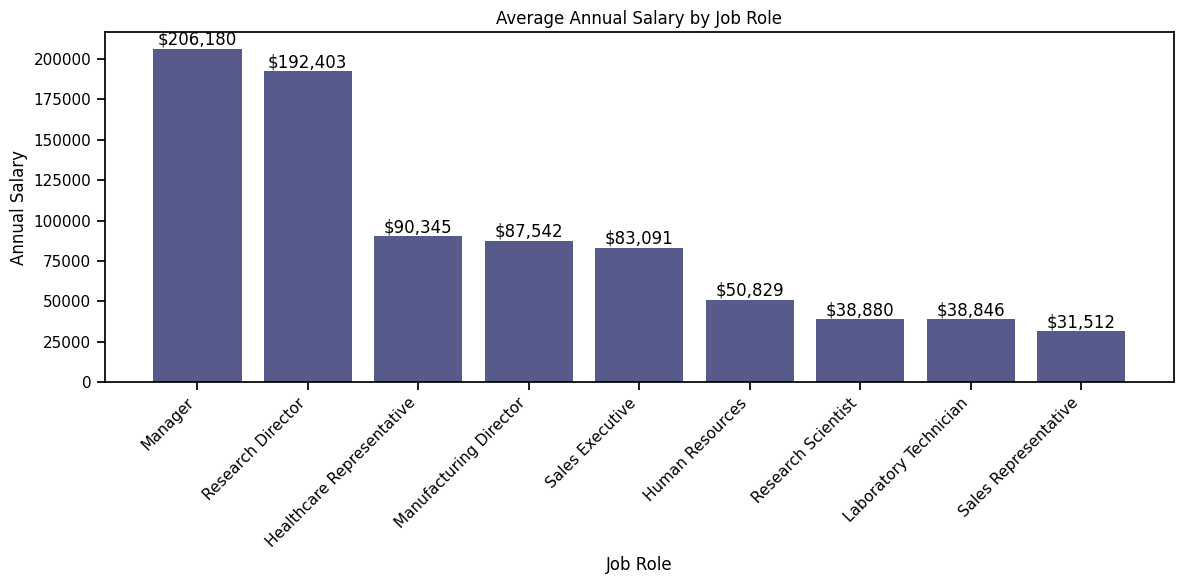

In [12]:
# Prepare data
plot_df = data.groupby('JobRole')['MonthlyIncome'].mean() * 12
plot_df = plot_df.rename('Salary').reset_index().sort_values('Salary', ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars
bars = ax.bar(plot_df['JobRole'], plot_df['Salary'], color='#0E165B', alpha=0.7)

# Customize the plot
ax.set_xlabel('Job Role')
ax.set_ylabel('Annual Salary')
ax.set_title('Average Annual Salary by Job Role')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add salary labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:,.0f}',
            ha='center', va='bottom')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


Managers and Research Directors have the highest average salaries, while Laboratory Technicians and Sales Representatives have the lowest.

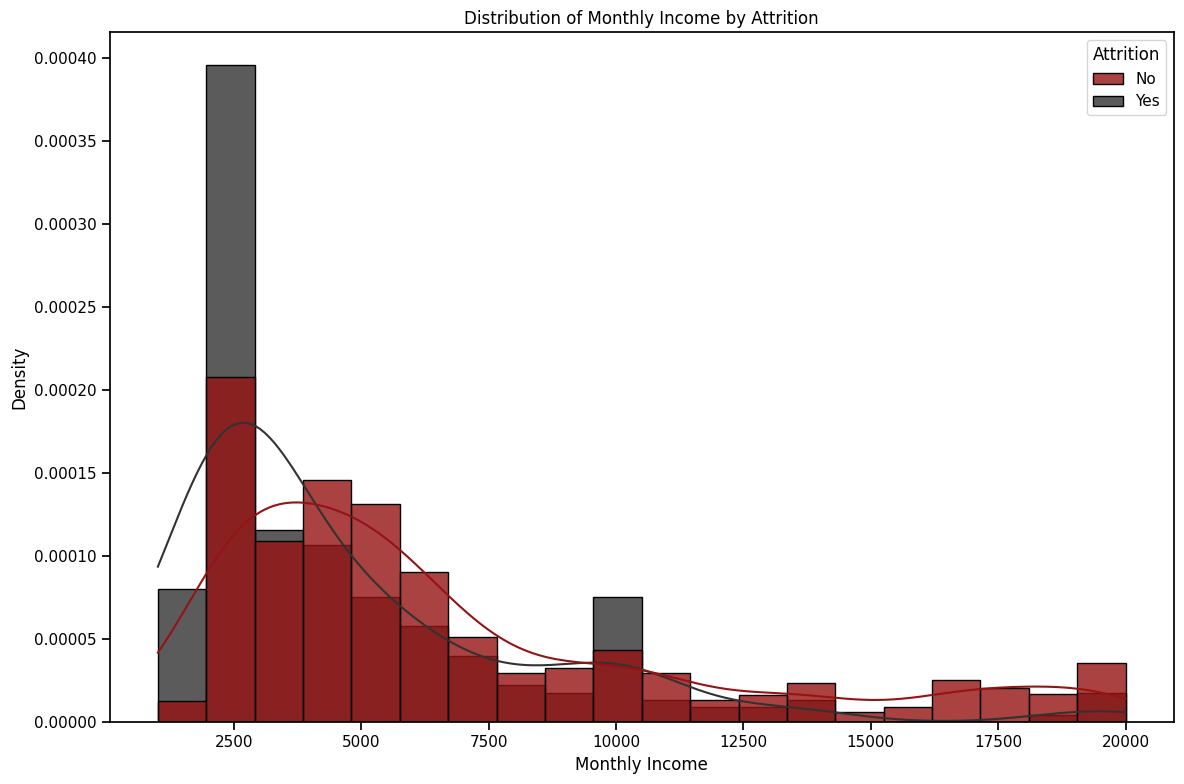

In [13]:
# Prepare data
plot_df = data.sort_values(by="Attrition")

# Create the plot
plt.figure(figsize=(12, 8))

# Histogram with density
sns.histplot(data=plot_df, x='MonthlyIncome', hue='Attrition', kde=True, 
             stat='density', common_norm=False, alpha=0.8, 
             palette={'Yes': '#323232', 'No': '#961313'})

plt.title('Distribution of Monthly Income by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Density')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


The distribution of monthly income for both current and former employees is positively skewed and lower overall among staff who left. Former employees had a median monthly income more than $2,000 less than current employees.

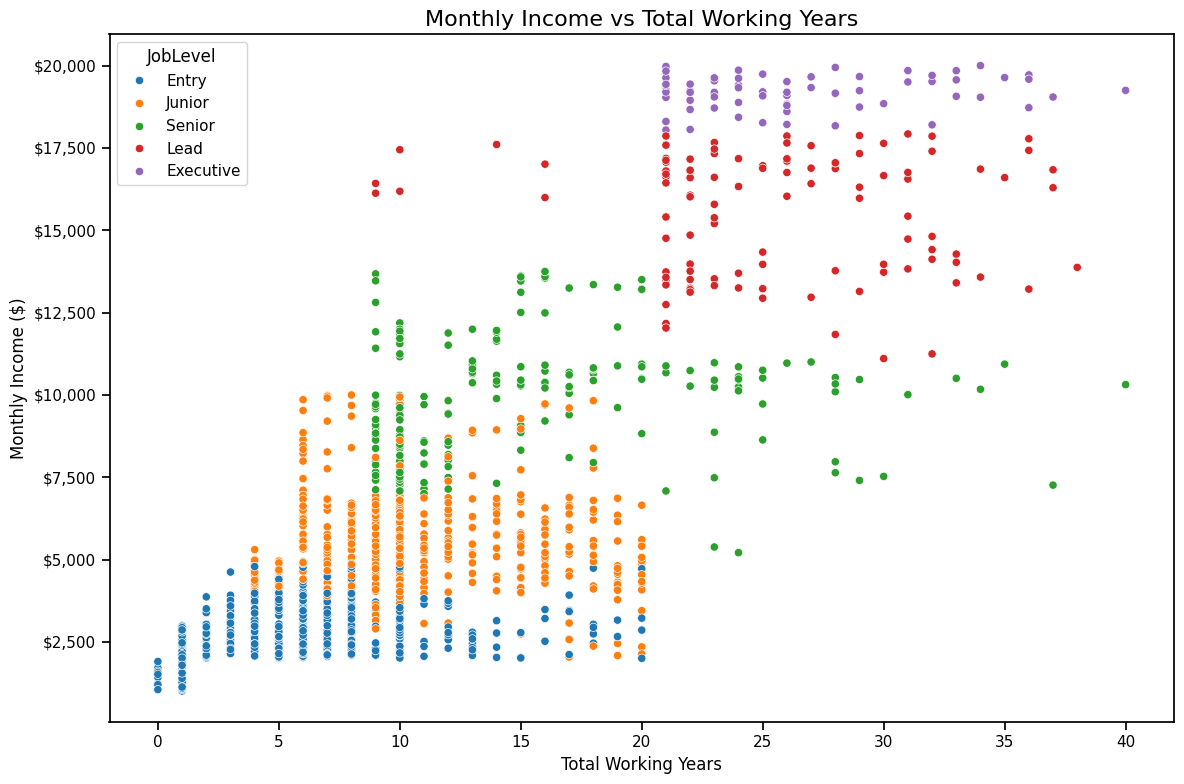

In [14]:
plot_df = data.copy()

# Ensure JobLevel is categorical and properly ordered
plot_df['JobLevel'] = pd.Categorical(plot_df['JobLevel'], categories=[1, 2, 3, 4, 5], ordered=True)
plot_df['JobLevel'] = plot_df['JobLevel'].cat.rename_categories(['Entry', 'Junior', 'Senior', 'Lead', 'Executive'])

# Set up the plot
fig, ax3 = plt.subplots(figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=plot_df, x='TotalWorkingYears', y='MonthlyIncome', hue='JobLevel', ax=ax3)
ax3.set_title('Monthly Income vs Total Working Years', fontsize=16)
ax3.set_xlabel('Total Working Years', fontsize=12)
ax3.set_ylabel('Monthly Income ($)', fontsize=12)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()


Based on the scatterplot above, monthly income is positively correlated with total number of years worked and there is strong association between an employee's earnings and their job level.

# Data Cleaning and Preprocessing

There are several columns in the data that have numeric values that represent categories, like `Education` that has values of 1 through 5 representing different levels of education. These columns were converted to categorical variables to perform significance testing for feature selection. I then removed columns with zero variance from the data since these can lead to errors in model fitting. Lastly, to reduce the skewness in the data, I log-transformed variables that had a skewness above 0.75.

In [15]:
def preprocess_data(data, cat_cols):
    # Identify zero variance columns
    nzv = [col for col in data.columns if data[col].nunique() == 1]
    
    # Convert categorical columns to category dtype
    for col in cat_cols:
        if col != 'Attrition':
            data[col] = data[col].astype('category')
    
    # Remove zero variance columns and EmployeeNumber
    print("Dropping variables with zero variance:", nzv)
    columns_to_drop = nzv + ['EmployeeNumber']
    df = data.drop(columns=columns_to_drop)
    
    return df

# Example usage
cat_cols = ['Gender', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']
df = preprocess_data(data, cat_cols)
print(df.shape)


Dropping variables with zero variance: ['EmployeeCount', 'Over18', 'StandardHours']
(1470, 31)


In [16]:
def identify_and_transform_skewed(df, skew_limit=0.75):
    # Identify skewed columns
    skew_cols = df.select_dtypes(include=['float64', 'int64']).agg(['skew']).T
    skew_cols = skew_cols[skew_cols['skew'].abs() > skew_limit]
    
    # Display skewed columns
    print("Columns to be log-transformed:")
    display(skew_cols)
    
    # Log-transform skewed columns
    for col in skew_cols.index:
        df[col] = np.log1p(df[col])
    
    return df

df = identify_and_transform_skewed(data.copy())

Columns to be log-transformed:


,skew
DistanceFromHome,0.958118
JobLevel,1.025401
MonthlyIncome,1.369817
NumCompaniesWorked,1.026471
PercentSalaryHike,0.821128
PerformanceRating,1.921883
StockOptionLevel,0.968980
TotalWorkingYears,1.117172
YearsAtCompany,1.764529
YearsInCurrentRole,0.917363


# Independent T-Test

To compare the average monthly income among current and former employees, I'll perform an independent t-test. This will allow us to determine whether there is a statistically significant difference between the average incomes of the two populations. To test this, I'll use the log-transformed data since one of the assumptions of the test is that the continuous variable is approximately normally distributed.

#### Hypothesis:

**1.The null hypothesis for the t-test is that the average monthly income of former employees is the same as current employees.** 

  u1 = u2
  
**2.The alternative hypothesis is that the average monthly income of former employees is different than current employees.**

  u1!=u2


In [17]:
import researchpy as rp
# Perform t-test
summary, res = rp.ttest(
    group1=df['MonthlyIncome'][df['Attrition'] == 'Yes'], 
    group2=df['MonthlyIncome'][df['Attrition'] == 'No'], 
    group1_name='Former Employees', 
    group2_name='Current Employees'
)

print("\nSummary Statistics:")
display(summary)
display(res)


Summary Statistics:


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Former Employees,237.0,8.252532,0.640059,0.041576,8.170624,8.334440
1,Current Employees,1233.0,8.610458,0.653497,0.018611,8.573946,8.646970
2,combined,1470.0,8.552752,0.664313,0.017327,8.518764,8.586739


,Independent t-test,results
0,Difference (Former Employees - Current Employe...,-0.3579
1,Degrees of freedom =,1468.0000
2,t =,-7.7477
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.5495
7,Hedge's g =,-0.5492
8,Glass's delta1 =,-0.5592
9,Point-Biserial r =,-0.1982


The p-value of the t-test is 0, which is less than the significance level of 0.05. This indicates strong evidence to support that the average monthly income of former employees differs significantly from that of current employees.

# Chi-Square Test of Independence

To determine if there is a relationship between `Attrition` and the other categorical variables in the data set, I will use the chi-square test of independence. The null hypothesis for this test is that the variables are independent, there is no association between `Attrition` and the variable being tested, while the alternative hypothesis is that that there is a relationship.

In [18]:
cat_cols = df.select_dtypes(include="category").columns.tolist()
chi_results = []
vars_rm = []

for col in cat_cols:
    observed = pd.crosstab(df["Attrition"], df[col])
    stat, p, _, _ = chi2_contingency(observed)
    chi_results.append((col, stat, p))
    if p >= 0.05:
        print(f"Attrition and {col} are independent (p-value = {p:.2f}).")
        vars_rm.append(col)

chi_df = pd.DataFrame(chi_results, columns=["Variable", "Chi_Statistic", "P_value"])
chi_df = chi_df[chi_df["P_value"] < 0.05].sort_values("P_value", ascending=True)
display(chi_df)

Attrition and Gender are independent (p-value = 0.29).


,Variable,Chi_Statistic,P_value
5,OverTime,87.564294,8.158424e-21
3,JobRole,86.190254,2.752482e-15
4,MaritalStatus,46.163677,9.455511e-11
0,Department,10.796007,4.525607e-03
1,EducationField,16.024674,6.773980e-03


Based on the chi-square test results, significant factors for employee attrition include `overtime`, `job role`, `marital status`, `department`, and `education field` (p-value < 0.05). The strongest factor is overtime (p-value = 8.16e-21), followed by job role (p-value = 2.75e-15) and marital status (p-value = 9.46e-11).

Independent variables like `gender` (p-value = 0.29) will be removed as they don't significantly relate to attrition.

# Predicting Employee Attrition

# Encode Categorical Columns

In [19]:
def prepare_data(df, target_col, vars_to_remove, vars_to_dummify):
    # Prepare target variable
    y = (df[target_col] == 'Yes').astype(int)
    
    # Prepare feature matrix
    X = df.drop(columns=[target_col] + vars_to_remove)
    
    # Create dummy variables
    X = pd.get_dummies(X, columns=vars_to_dummify, drop_first=True)
    
    # Clean column names
    X.columns = X.columns.str.replace(' ', '')
    
    return X, y

X, y = prepare_data(df, 'Attrition', vars_rm, chi_df.Variable.values)
X.head()

,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,JobRole_SalesRepresentative,MaritalStatus_Married,MaritalStatus_Single,Department_Research&Development,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree
0,41,Travel_Rarely,1102,0.693147,2,1,1,2,94,3,...,False,False,True,False,True,True,False,False,False,False
1,49,Travel_Frequently,279,2.197225,1,1,2,3,61,2,...,False,True,False,True,False,True,False,False,False,False
2,37,Travel_Rarely,1373,1.098612,2,1,4,4,92,2,...,False,False,True,True,False,False,False,False,True,False
3,33,Travel_Frequently,1392,1.386294,4,1,5,4,56,3,...,False,True,False,True,False,True,False,False,False,False
4,27,Travel_Rarely,591,1.098612,1,1,7,1,40,3,...,False,True,False,True,False,False,False,True,False,False


# Create Training, Validation, and Test Sets

In [20]:
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.7, random_state=21)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=21)

print("Train Shape:", X_train.shape, y_train.shape)
print("Validation set Shape:", X_val.shape,y_val.shape)
print("Test set Shape:", X_test.shape, y_test.shape)

Train Shape: (1029, 46) (1029,)
Validation set Shape: (220, 46) (220,)
Test set Shape: (221, 46) (221,)


# Scale Features

In [21]:
# Create a list of numerical columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()

# Create a list of categorical columns
categorical_columns = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns of X_train
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns]), columns=numeric_columns, index=X_train.index)

# Transform the numeric columns of X_val and X_test
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_columns]), columns=numeric_columns, index=X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns, index=X_test.index)

# Combine scaled numeric columns with categorical columns
X_train_final = pd.concat([X_train_scaled, X_train[categorical_columns]], axis=1)
X_val_final = pd.concat([X_val_scaled, X_val[categorical_columns]], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test[categorical_columns]], axis=1)

# Display the first few rows of the transformed training data
X_train_final.head()


,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_SalesRepresentative,MaritalStatus_Married,MaritalStatus_Single,Department_Research&Development,Department_Sales,EducationField_LifeSciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_TechnicalDegree
273,0.039281,-1.431033,-0.023528,1.049282,0.0,-1.073621,0.236636,1.548533,0.372441,0.118015,...,False,True,False,False,True,False,False,True,False,False
373,-1.056109,1.632008,-1.477589,-0.861711,0.0,-0.877467,1.155496,0.767530,0.372441,-1.076666,...,False,False,False,True,False,False,False,True,False,False
1022,0.039281,1.493788,-0.202448,-0.861711,0.0,0.676927,0.236636,0.865156,1.746069,-1.076666,...,False,False,True,True,False,False,False,False,False,True
1424,-0.179797,1.449361,0.390459,1.049282,0.0,1.613190,-0.682225,-0.892100,0.372441,0.118015,...,False,False,True,True,False,False,False,True,False,False
1374,2.339599,-0.500520,1.305609,0.093785,0.0,1.497806,1.155496,0.279404,0.372441,1.623135,...,False,True,False,False,True,True,False,False,False,False


#  Tune Parameters of Random Forest

In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=92))
])

# Parameter tuning
param_grid = {
    'classifier__n_estimators': np.linspace(100, 500, 5, dtype=int),
    'classifier__max_features': [None, 'sqrt'],
    'classifier__max_depth': [None, 5, 7, 14, 21],
    'classifier__min_samples_split': [2, 5, 8],
    'classifier__min_samples_leaf': [3, 4, 5],
    'classifier__bootstrap': [True, False]
}

# Randomized Search CV
rf_cv = RandomizedSearchCV(pipeline, param_grid, scoring='roc_auc', 
                           n_iter=100, cv=5, random_state=92, n_jobs=-1)

# Fit the model
rf_cv.fit(X_train, y_train)

# Print results
print(f"Best AUC: {rf_cv.best_score_:.3f}")
print(f"Best Params: {rf_cv.best_params_}")

# Evaluate on validation set
val_score = rf_cv.score(X_val, y_val)
print(f"Validation AUC: {val_score:.3f}")

Best AUC: 0.748
Best Params: {'classifier__n_estimators': 500, 'classifier__min_samples_split': 8, 'classifier__min_samples_leaf': 5, 'classifier__max_features': 'sqrt', 'classifier__max_depth': 14, 'classifier__bootstrap': True}
Validation AUC: 0.763


This configuration resulted in a model with good predictive power for employee attrition, as indicated by the AUC score of 0.748. The model's performance suggests it has a strong ability to distinguish between employees who are likely to leave and those who are likely to stay with the company.

# Feature importance

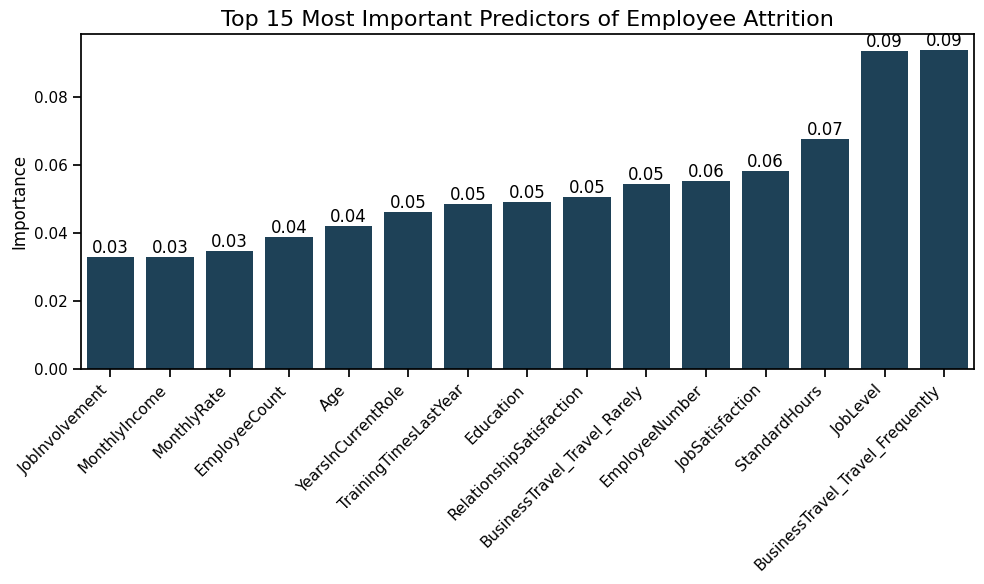

In [27]:
rf_classifier = rf_cv.best_estimator_.named_steps['classifier']
preprocessor = rf_cv.best_estimator_.named_steps['preprocessor']
onehot_encoder = preprocessor.named_transformers_['cat']

# Get feature names correctly
cat_feature_names = onehot_encoder.get_feature_names_out()
num_feature_names = preprocessor.named_transformers_['num'].get_feature_names_out()
feature_names = list(cat_feature_names) + list(num_feature_names)

feat_importance = pd.DataFrame({"Importance": rf_classifier.feature_importances_}, index=feature_names)
top_15 = feat_importance.nlargest(15, 'Importance').sort_values(by="Importance")

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_15.index, y='Importance', data=top_15, color='#154360')

plt.title('Top 15 Most Important Predictors of Employee Attrition', fontsize=16)
plt.xlabel('')
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')

for i, v in enumerate(top_15['Importance']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

This bar graph shows the top predictors of employee attrition based on random forest's Gini importance. `Monthly income`, `age`, and `overtime` are the most important factors. Job history details like total working years, tenure with the company and manager, proximity to the office, and salary increases are also key contributors.

# Model evaluation

In [26]:
val_auc = roc_auc_score(y_val, rf_cv.predict_proba(X_val)[:, 1])
test_auc = roc_auc_score(y_test, rf_cv.predict_proba(X_test)[:, 1])
val_acc = accuracy_score(y_val, rf_cv.predict(X_val))
test_acc = accuracy_score(y_test, rf_cv.predict(X_test))

print(f"Validation Accuracy: {val_acc*100:.1f}% and AUC = {val_auc:.3f}")
print(f"Test Accuracy: {test_acc*100:.1f}% and AUC = {test_auc:.3f}")

Validation Accuracy: 83.6% and AUC = 0.763
Test Accuracy: 84.2% and AUC = 0.713


# Conclusion
In our analysis, we observed that 16% of employees left the company in the last quarter, with the majority from the Research & Development department. Notably, in the Human Resources department, women exhibited the highest turnover rate. Employees with the lowest work-life balance were most prone to leaving, with approximately 1 in 4 departing. Interestingly, most departing employees rated their job satisfaction as good or excellent. Those who left generally earned less, with a median monthly income approximately $2,000 lower than current employees. Factors like education level, performance rating, and gender showed no significant impact on employee attrition.

According to our Random Forest model, an employee's age, income, tenure, and job history with the company were identified as crucial predictors of attrition. The model achieved an Area Under the Curve (AUC) score of 0.774 on the validation set and 0.816 on the test set for predicting employee departures. To enhance the model's performance, incorporating additional data from departed employees or implementing weighted sampling methods to address class imbalance could be beneficial.
